## House Price Analysis (makaan.com)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

# Data Collection using Web scraping technique

In [2]:
URL='https://www.makaan.com/listings?propertyType=apartment,villa,independent-house&budget=2500000,&ageOfProperty=any&furnished=furnished&listingType=buy&pageType=LISTINGS_PROPERTY_URLS&cityName=Hyderabad&cityId=12&templateId=MAKAAN_CITY_LISTING_BUY&sellerRating=any&page=1'

In [3]:
page=requests.get(URL)

In [4]:
page.status_code

200

In [5]:
pagecontent=page.text
pagecontent

'<!doctype html> <html lang="en"><head><meta http-equiv="Content-type" content="text/html; charset=utf-8"><title>properties in Hyderabad :Makaan.com</title><meta name="theme-color" content="#fff" id="themeColor"><meta content="origin" name="referrer"><meta name="p:domain_verify" content="55ce01b3ca93c05fd5a41439a23dd0d9"><meta name="fb:pages" content="155462194517712"><meta name="viewport" content="minimum-scale=1.0, width=device-width, initial-scale=1.0, maximum-scale=5.0, user-scalable=no"><link rel="preload" href="//static.makaan.com/scripts/vendor/require.min.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/main.ff46637b.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/infra.a7ac1784.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/dependency/commonBundle.8af07cde.js" as="script"><link rel="preload" href="//static.makaan.com/scripts/app.7d0dcfaa.js" as="script"><meta name="twitter:card" content="summary"><meta name="twi

In [6]:
soup=BeautifulSoup(pagecontent)

In [7]:
soup.find_all('div',attrs={'data-type':'price-link'})

[<div data-type="price-link"><sup class="rupee currency"> </sup><span class="val" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer"><meta content="https://www.makaan.com/hyderabad/swaraj-homes-nectar-gardens-in-madhapur-19661603/4bhk-4t-3650-sqft-villa" itemprop="url"/><meta content="70000000 " itemprop="price"/><meta content="INR" itemprop="priceCurrency"/>7</span><span class="unit"> Cr</span></div>,
 <div data-type="price-link"><sup class="rupee currency"> </sup><span class="val" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer"><meta content="https://www.makaan.com/hyderabad/swaraj-homes-satya-trilok-tower-in-sainikpuri-19835930/2bhk-2t-1000-sqft-apartment" itemprop="url"/><meta content="5500000 " itemprop="price"/><meta content="INR" itemprop="priceCurrency"/>55</span><span class="unit"> L</span></div>,
 <div data-type="price-link"><sup class="rupee currency"> </sup><span class="val" itemprop="offers" itemscope="" itemtype="http://schema.org/Offer"><

In [8]:
list1=soup.find_all('div',attrs={'class':'infoWrap'})
list1

[<div class="infoWrap" itemprop="event" itemref="itemImageFor-19661603" itemscope="" itemtype="http://schema.org/Event"><div class="title-line-wrap"><div class="title-line"><a class="typelink" data-type="listing-link" href="https://www.makaan.com/hyderabad/swaraj-homes-nectar-gardens-in-madhapur-19661603/4bhk-4t-3650-sqft-villa" itemprop="url" target="_blank"><meta content="4 BHK Villa for sale" id="itemNameFor-19661603" itemprop="name"/><strong><span class="val">4 </span><span>BHK </span><span>Villa</span></strong></a><span class="project-wrap"> in <strong><a class="projName" data-link-name="Swaraj Homes Nectar Gardens" data-link-type="project overview" data-track-label="19661603_1_1498348_select" data-type="projName" href="https://www.makaan.com/hyderabad/swaraj-homes-nectar-gardens-in-madhapur-1498348" target="_blank" title="Go to Swaraj Homes Nectar Gardens"><span>Swaraj Homes Nectar Gardens</span></a></strong></span></div><div style="width:100%"><div class="locWrap" itemprop="loca

In [9]:
list1[2]

<div class="infoWrap" itemprop="event" itemref="itemImageFor-19852866" itemscope="" itemtype="http://schema.org/Event"><div class="title-line-wrap"><div class="title-line"><a class="typelink" data-type="listing-link" href="https://www.makaan.com/hyderabad/reputed-builder-indira-nivas-in-kukatpally-19852866/3bhk-3t-1500-sqft-apartment" itemprop="url" target="_blank"><meta content="3 BHK Apartment for sale" id="itemNameFor-19852866" itemprop="name"/><strong><span class="val">3 </span><span>BHK </span><span>Apartment</span></strong></a><span class="project-wrap"> in <strong><a class="projName" data-link-name="Reputed Builder Indira Nivas" data-link-type="project overview" data-track-label="19852866_3_3011530_select" data-type="projName" href="https://www.makaan.com/hyderabad/reputed-builder-indira-nivas-in-kukatpally-3011530" target="_blank" title="Go to Reputed Builder Indira Nivas"><span>Reputed Builder Indira Nivas</span></a></strong></span></div><div style="width:100%"><div class="loc

In [10]:
for i in list1:
    price=i.find('div',attrs={'data-type':'price-link'})
    print(price.text)

 7 Cr
 55 L
 65 L
 1.35 Cr
 68 L
 2.35 Cr
 4 Cr
 70 L
 1.75 Cr
 55 L
 74 L
 66 L
 54 L
 1.48 Cr
 54 L
 1.2 Cr
 75 L
 75 L
 4.5 Cr
 1.6 Cr


In [11]:
price_list=[]
BHK_list=[]
location_list=[]
area_in_sqft_list=[]
price_per_sqft_list=[]
name_list=[]
bath_status_list=[]
details_list=[]
for i in range(1,42):
    URL='https://www.makaan.com/listings?propertyType=apartment,villa,independent-house&budget=2500000,&ageOfProperty=any&furnished=furnished&listingType=buy&pageType=LISTINGS_PROPERTY_URLS&cityName=Hyderabad&cityId=12&templateId=MAKAAN_CITY_LISTING_BUY&sellerRating=any&_=1662371001517&page='+str(i)
    page=requests.get(URL)
    pagecontent=page.text
    soup=BeautifulSoup(pagecontent)
    list_1=soup.find_all('div',attrs={'class':'infoWrap'})
    
    for j in list_1:
        price=j.find('td',attrs={'class':'price'})
        if price is None:
            price_list.append(np.NaN)
        else:
            price_list.append(price.text)
        
        BHK=j.find('span',attrs={'class':'val'})
        if BHK is None:
            BHK_list.append(np.NaN)
        else:
            BHK_list.append(BHK.text)
        
        location=j.find('span',attrs={'itemprop':'addressLocality'})
        if location is None:
            location_list.append(np.NaN)
        else:
            location_list.append(location.text)
        
        area_in_sqft=j.find('td',attrs={'class':'size'})
        if area_in_sqft is None:
            area_in_sqft_list.append(np.NaN)
        else:
            area_in_sqft_list.append(area_in_sqft.text)
        
        price_per_sqft=j.find('td',attrs={'class':'lbl rate'})
        if price_per_sqft is None:
            price_per_sqft_list.append(np.NaN)
        else:
            price_per_sqft_list.append(price_per_sqft.text)
        
        name=j.find('a',attrs={'class':'projName'})
        if name is None:
            name_list.append(np.NaN)
        else:
            name_list.append(name.text)
        
        bath_status=j.find('ul',attrs={'class':'listing-details'})
        if bath_status is None:
            bath_status_list.append(np.NaN)
        else:
            bath_status_list.append(bath_status.text)
        
        details=j.find('a',attrs={'target':'_blank'})
        if details is None:
            details_list.append(np.NaN)
        else:
            details_list.append(details.text)



In [12]:
len(price_list)

793

In [13]:
len(BHK_list)

793

In [14]:
house=pd.DataFrame({'name':name_list,'location':location_list,'details':details_list,'area_in_sqft':area_in_sqft_list,'price_per_sqft':price_per_sqft_list,'BHK':BHK_list,'bath_status':bath_status_list,'price':price_list})

In [15]:
house

,name,location,details,area_in_sqft,price_per_sqft,BHK,bath_status,price
0,Swaraj Homes Nectar Gardens,Madhapur,4 BHK Villa,3650,"19,178 / sq ft",4,4 BathroomsResale East facing,7 Cr
1,Swaraj Homes Satya Trilok Tower,Sainikpuri,2 BHK Apartment,1000,"5,500 / sq ft",2,2 BathroomsResale,55 L
2,Reputed Builder Indira Nivas,Kukatpally,3 BHK Apartment,1500,"4,333 / sq ft",3,3 BathroomsResale West facing,65 L
3,Accurate Wind Chimes,Narsingi,3 BHK Apartment,1600,"8,437 / sq ft",3,3 BathroomsResale West facing,1.35 Cr
4,NaN,Kompally,2 BHK Apartment,1270,"5,354 / sq ft",2,2 BathroomsResale,68 L
...,...,...,...,...,...,...,...,...
788,NaN,Trimulgherry,8 BHK Independent House,8000,"5,312 / sq ft",8,2 BathroomsResale East facing,4.25 Cr
789,NaN,Trimulgherry,3 BHK Apartment,1700,"4,529 / sq ft",3,0 - 1 year old2 Bathrooms1st of 4floor,77 L
790,NaN,Malkajgiri,3 BHK Independent House,1300,"7,307 / sq ft",3,2 BathroomsResale East facing,95 L
791,NaN,Dammaiguda,2 BHK Independent House,1350,"6,666 / sq ft",2,2 BathroomsResale East facing,90 L


In [16]:
house.to_csv(r'C:\Users\VIRAJ\desktop\uncleaned data.csv')

In [17]:
po=re.compile('[A-Z][a-z]+')
po.search(house.details[0]).group()

'Villa'

In [18]:
house['building_type']=house['details'].apply(lambda x:re.compile('[A-Z][a-z]+').search(x).group())

In [19]:
house.bath_status[390]

'4 - 5 years old4 BathroomsResale '

In [20]:
l=[]
for i in house.bath_status:
    if 'Bathrooms' in i:
        l.append(re.findall('(\d)\sBathrooms',str(i))[0])
    else:
        l.append(np.NaN)
l   

['4',
 '2',
 '3',
 '3',
 '2',
 '4',
 '4',
 '3',
 '7',
 '2',
 '2',
 '2',
 '2',
 '5',
 '2',
 '3',
 '2',
 '2',
 '4',
 '3',
 '4',
 '2',
 '3',
 '2',
 '5',
 '3',
 '2',
 '3',
 '2',
 '5',
 '8',
 '4',
 '3',
 '3',
 '2',
 '3',
 '3',
 '2',
 '2',
 '2',
 '3',
 '6',
 '2',
 '3',
 '2',
 '2',
 '6',
 '2',
 '7',
 '9',
 '3',
 '3',
 '2',
 '3',
 '2',
 '2',
 '6',
 '2',
 '2',
 '7',
 '3',
 '2',
 '3',
 '4',
 '5',
 '3',
 '3',
 '4',
 '4',
 '3',
 '4',
 '5',
 '2',
 '9',
 '4',
 '5',
 '3',
 '2',
 '2',
 '5',
 '3',
 '2',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '8',
 '2',
 '3',
 '1',
 '3',
 '2',
 '3',
 '2',
 '8',
 '3',
 '3',
 '2',
 '2',
 '6',
 '2',
 '4',
 '2',
 '2',
 '5',
 '3',
 '4',
 '2',
 '2',
 '3',
 '5',
 '5',
 '2',
 '4',
 '3',
 '3',
 '3',
 '3',
 '3',
 '5',
 '3',
 '9',
 '3',
 '3',
 '3',
 '5',
 '2',
 '3',
 '3',
 '5',
 '5',
 '4',
 '4',
 '3',
 '4',
 '4',
 '3',
 '2',
 '2',
 '2',
 '2',
 '3',
 '2',
 '3',
 '2',
 '3',
 '3',
 '4',
 '2',
 '1',
 '2',
 '2',
 '3',
 '4',
 '2',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '4',
 '3',
 '4',
 '4'

In [21]:
house['bathrooms']=l

In [22]:
house.head()

,name,location,details,area_in_sqft,price_per_sqft,BHK,bath_status,price,building_type,bathrooms
0,Swaraj Homes Nectar Gardens,Madhapur,4 BHK Villa,3650,"19,178 / sq ft",4,4 BathroomsResale East facing,7 Cr,Villa,4
1,Swaraj Homes Satya Trilok Tower,Sainikpuri,2 BHK Apartment,1000,"5,500 / sq ft",2,2 BathroomsResale,55 L,Apartment,2
2,Reputed Builder Indira Nivas,Kukatpally,3 BHK Apartment,1500,"4,333 / sq ft",3,3 BathroomsResale West facing,65 L,Apartment,3
3,Accurate Wind Chimes,Narsingi,3 BHK Apartment,1600,"8,437 / sq ft",3,3 BathroomsResale West facing,1.35 Cr,Apartment,3
4,NaN,Kompally,2 BHK Apartment,1270,"5,354 / sq ft",2,2 BathroomsResale,68 L,Apartment,2


In [23]:
l1=[]
for i in house.bath_status:
    if 'Resale' in i:
        l1.append(re.findall('Resale',str(i))[0])
    elif 'New' in i:
        l1.append(re.findall('New',str(i))[0])
    else:
        l1.append(np.NaN)
l1

['Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'New',
 'Resale',
 'Resale',
 'New',
 'Resale',
 'Resale',
 'Resale',
 'New',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'New',
 'Resale',
 'Resale',
 'New',
 'Resale',
 'Resale',
 'Resale',
 'New',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'Resale',
 'New',
 'Resale',
 'Resale',
 'Resale',
 'New',
 'Resale',
 'New',
 'New',
 'Resal

In [24]:
house['house_status']=l1

In [25]:
house

,name,location,details,area_in_sqft,price_per_sqft,BHK,bath_status,price,building_type,bathrooms,house_status
0,Swaraj Homes Nectar Gardens,Madhapur,4 BHK Villa,3650,"19,178 / sq ft",4,4 BathroomsResale East facing,7 Cr,Villa,4,Resale
1,Swaraj Homes Satya Trilok Tower,Sainikpuri,2 BHK Apartment,1000,"5,500 / sq ft",2,2 BathroomsResale,55 L,Apartment,2,Resale
2,Reputed Builder Indira Nivas,Kukatpally,3 BHK Apartment,1500,"4,333 / sq ft",3,3 BathroomsResale West facing,65 L,Apartment,3,Resale
3,Accurate Wind Chimes,Narsingi,3 BHK Apartment,1600,"8,437 / sq ft",3,3 BathroomsResale West facing,1.35 Cr,Apartment,3,Resale
4,NaN,Kompally,2 BHK Apartment,1270,"5,354 / sq ft",2,2 BathroomsResale,68 L,Apartment,2,Resale
...,...,...,...,...,...,...,...,...,...,...,...
788,NaN,Trimulgherry,8 BHK Independent House,8000,"5,312 / sq ft",8,2 BathroomsResale East facing,4.25 Cr,Independent,2,Resale
789,NaN,Trimulgherry,3 BHK Apartment,1700,"4,529 / sq ft",3,0 - 1 year old2 Bathrooms1st of 4floor,77 L,Apartment,2,NaN
790,NaN,Malkajgiri,3 BHK Independent House,1300,"7,307 / sq ft",3,2 BathroomsResale East facing,95 L,Independent,2,Resale
791,NaN,Dammaiguda,2 BHK Independent House,1350,"6,666 / sq ft",2,2 BathroomsResale East facing,90 L,Independent,2,Resale


In [26]:
re.findall('(\d)\sBathrooms',str(house['bath_status'][0]))

['4']

## Data cleaning

In [27]:
house['price_per_sqft']=house['price_per_sqft'].apply(lambda x:x.replace(",",''))

In [28]:
house['price_per_sqft']=house['price_per_sqft'].apply(lambda x:x.replace('/',""))

In [29]:
house['price_per_sqft']=house['price_per_sqft'].apply(lambda x:x.replace('sq ft',""))

In [30]:
house.head()

,name,location,details,area_in_sqft,price_per_sqft,BHK,bath_status,price,building_type,bathrooms,house_status
0,Swaraj Homes Nectar Gardens,Madhapur,4 BHK Villa,3650,19178,4,4 BathroomsResale East facing,7 Cr,Villa,4,Resale
1,Swaraj Homes Satya Trilok Tower,Sainikpuri,2 BHK Apartment,1000,5500,2,2 BathroomsResale,55 L,Apartment,2,Resale
2,Reputed Builder Indira Nivas,Kukatpally,3 BHK Apartment,1500,4333,3,3 BathroomsResale West facing,65 L,Apartment,3,Resale
3,Accurate Wind Chimes,Narsingi,3 BHK Apartment,1600,8437,3,3 BathroomsResale West facing,1.35 Cr,Apartment,3,Resale
4,NaN,Kompally,2 BHK Apartment,1270,5354,2,2 BathroomsResale,68 L,Apartment,2,Resale


In [31]:
b=house.price.apply(lambda x:x.split())
b

0         [7, Cr]
1         [55, L]
2         [65, L]
3      [1.35, Cr]
4         [68, L]
          ...    
788    [4.25, Cr]
789       [77, L]
790       [95, L]
791       [90, L]
792       [95, L]
Name: price, Length: 793, dtype: object

In [32]:
d=[]
for i in range(len(house.price)):
    if b[i][1]=="Cr":
        d.append(int(float(b[i][0])*10000000))
    if b[i][1]=="L":
        d.append(int(float(b[i][0])*100000))
d

[70000000,
 5500000,
 6500000,
 13500000,
 6800000,
 23500000,
 40000000,
 7000000,
 17500000,
 5500000,
 7400000,
 6600000,
 5400000,
 14800000,
 5400000,
 12000000,
 7500000,
 7500000,
 45000000,
 16000000,
 35000000,
 5000000,
 10500000,
 10800000,
 39800000,
 15000000,
 6000000,
 40000000,
 9000000,
 80000000,
 28000000,
 19500000,
 18000000,
 18000000,
 11000000,
 20000000,
 9000000,
 7000000,
 15000000,
 8900000,
 7000000,
 58500000,
 8200000,
 11600000,
 3800000,
 3500000,
 22500000,
 5400000,
 45000000,
 17000000,
 8700000,
 22500000,
 8970000,
 10500000,
 26900000,
 9200000,
 22000000,
 8000000,
 5800000,
 200000000,
 8500000,
 6700000,
 6200000,
 31500000,
 130000000,
 22000000,
 12800000,
 135000000,
 35000000,
 25000000,
 37500000,
 69900000,
 4849000,
 30000000,
 34900000,
 22500000,
 13000000,
 5400000,
 3850000,
 45000000,
 25000000,
 7800000,
 20000000,
 9900000,
 38000000,
 3200000,
 11000000,
 13000000,
 40000000,
 11000000,
 12900000,
 3200000,
 90000000,
 4580000,
 

In [33]:
house['price']=d

In [34]:
house.head()

,name,location,details,area_in_sqft,price_per_sqft,BHK,bath_status,price,building_type,bathrooms,house_status
0,Swaraj Homes Nectar Gardens,Madhapur,4 BHK Villa,3650,19178,4,4 BathroomsResale East facing,70000000,Villa,4,Resale
1,Swaraj Homes Satya Trilok Tower,Sainikpuri,2 BHK Apartment,1000,5500,2,2 BathroomsResale,5500000,Apartment,2,Resale
2,Reputed Builder Indira Nivas,Kukatpally,3 BHK Apartment,1500,4333,3,3 BathroomsResale West facing,6500000,Apartment,3,Resale
3,Accurate Wind Chimes,Narsingi,3 BHK Apartment,1600,8437,3,3 BathroomsResale West facing,13500000,Apartment,3,Resale
4,NaN,Kompally,2 BHK Apartment,1270,5354,2,2 BathroomsResale,6800000,Apartment,2,Resale


In [35]:
house['bathrooms'].isnull().sum()

16

In [36]:
house['house_status'].isnull().sum()

154

In [37]:
house.to_csv(r'C:\Users\VIRAJ\desktop\houses3.csv')

In [38]:
house.name.fillna(house.building_type,inplace=True)

In [39]:
house.head()

,name,location,details,area_in_sqft,price_per_sqft,BHK,bath_status,price,building_type,bathrooms,house_status
0,Swaraj Homes Nectar Gardens,Madhapur,4 BHK Villa,3650,19178,4,4 BathroomsResale East facing,70000000,Villa,4,Resale
1,Swaraj Homes Satya Trilok Tower,Sainikpuri,2 BHK Apartment,1000,5500,2,2 BathroomsResale,5500000,Apartment,2,Resale
2,Reputed Builder Indira Nivas,Kukatpally,3 BHK Apartment,1500,4333,3,3 BathroomsResale West facing,6500000,Apartment,3,Resale
3,Accurate Wind Chimes,Narsingi,3 BHK Apartment,1600,8437,3,3 BathroomsResale West facing,13500000,Apartment,3,Resale
4,Apartment,Kompally,2 BHK Apartment,1270,5354,2,2 BathroomsResale,6800000,Apartment,2,Resale


In [40]:
house.location.isnull().sum()

0

In [41]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            793 non-null    object
 1   location        793 non-null    object
 2   details         793 non-null    object
 3   area_in_sqft    793 non-null    object
 4   price_per_sqft  793 non-null    object
 5   BHK             793 non-null    object
 6   bath_status     793 non-null    object
 7   price           793 non-null    int64 
 8   building_type   793 non-null    object
 9   bathrooms       777 non-null    object
 10  house_status    639 non-null    object
dtypes: int64(1), object(10)
memory usage: 68.3+ KB


In [42]:
house['area_in_sqft']=house['area_in_sqft'].astype('int')

In [43]:
house['price_per_sqft']=house['price_per_sqft'].astype('int')

In [44]:
house['BHK']=house['BHK'].astype('int')

In [45]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            793 non-null    object
 1   location        793 non-null    object
 2   details         793 non-null    object
 3   area_in_sqft    793 non-null    int32 
 4   price_per_sqft  793 non-null    int32 
 5   BHK             793 non-null    int32 
 6   bath_status     793 non-null    object
 7   price           793 non-null    int64 
 8   building_type   793 non-null    object
 9   bathrooms       777 non-null    object
 10  house_status    639 non-null    object
dtypes: int32(3), int64(1), object(7)
memory usage: 59.0+ KB


In [46]:
house.loc[32]

name                         Ananda Homes Bay Hills
location                                   Narsingi
details                             3 BHK Apartment
area_in_sqft                                   1926
price_per_sqft                                 9345
BHK                                               3
bath_status       2 - 3 years old3 BathroomsResale 
price                                      18000000
building_type                             Apartment
bathrooms                                         3
house_status                                 Resale
Name: 32, dtype: object

In [47]:
house.bathrooms.isnull().sum()

16

In [48]:
house.bathrooms.fillna(house.BHK,inplace=True)

In [49]:
house.head()

,name,location,details,area_in_sqft,price_per_sqft,BHK,bath_status,price,building_type,bathrooms,house_status
0,Swaraj Homes Nectar Gardens,Madhapur,4 BHK Villa,3650,19178,4,4 BathroomsResale East facing,70000000,Villa,4,Resale
1,Swaraj Homes Satya Trilok Tower,Sainikpuri,2 BHK Apartment,1000,5500,2,2 BathroomsResale,5500000,Apartment,2,Resale
2,Reputed Builder Indira Nivas,Kukatpally,3 BHK Apartment,1500,4333,3,3 BathroomsResale West facing,6500000,Apartment,3,Resale
3,Accurate Wind Chimes,Narsingi,3 BHK Apartment,1600,8437,3,3 BathroomsResale West facing,13500000,Apartment,3,Resale
4,Apartment,Kompally,2 BHK Apartment,1270,5354,2,2 BathroomsResale,6800000,Apartment,2,Resale


In [50]:
house.bathrooms.isnull().sum()

0

In [51]:
house.house_status.fillna('not mentioned',inplace=True)

In [52]:
house.house_status.isnull().sum()

0

In [53]:
house.isnull().sum()

name              0
location          0
details           0
area_in_sqft      0
price_per_sqft    0
BHK               0
bath_status       0
price             0
building_type     0
bathrooms         0
house_status      0
dtype: int64

In [54]:
house['bathrooms']=house['bathrooms'].astype('int')

In [55]:
house.drop('details',axis=1,inplace=True)

In [56]:
house.drop('bath_status',axis=1,inplace=True)

In [57]:
house.duplicated().sum()

106

In [58]:
house.drop_duplicates(inplace=True)

In [59]:
house.duplicated().sum()

0

# Data exploration

In [60]:
house

,name,location,area_in_sqft,price_per_sqft,BHK,price,building_type,bathrooms,house_status
0,Swaraj Homes Nectar Gardens,Madhapur,3650,19178,4,70000000,Villa,4,Resale
1,Swaraj Homes Satya Trilok Tower,Sainikpuri,1000,5500,2,5500000,Apartment,2,Resale
2,Reputed Builder Indira Nivas,Kukatpally,1500,4333,3,6500000,Apartment,3,Resale
3,Accurate Wind Chimes,Narsingi,1600,8437,3,13500000,Apartment,3,Resale
4,Apartment,Kompally,1270,5354,2,6800000,Apartment,2,Resale
...,...,...,...,...,...,...,...,...,...
788,Independent,Trimulgherry,8000,5312,8,42500000,Independent,2,Resale
789,Apartment,Trimulgherry,1700,4529,3,7700000,Apartment,2,not mentioned
790,Independent,Malkajgiri,1300,7307,3,9500000,Independent,2,Resale
791,Independent,Dammaiguda,1350,6666,2,9000000,Independent,2,Resale


In [61]:
house.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 0 to 792
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   name            687 non-null    object
 1   location        687 non-null    object
 2   area_in_sqft    687 non-null    int32 
 3   price_per_sqft  687 non-null    int32 
 4   BHK             687 non-null    int32 
 5   price           687 non-null    int64 
 6   building_type   687 non-null    object
 7   bathrooms       687 non-null    int32 
 8   house_status    687 non-null    object
dtypes: int32(4), int64(1), object(4)
memory usage: 42.9+ KB


In [62]:
house.describe()

,area_in_sqft,price_per_sqft,BHK,price,bathrooms
count,687.000000,687.000000,687.000000,6.870000e+02,687.000000
mean,2291.365357,7802.467249,3.196507,2.102436e+07,2.903930
std,1557.791724,4954.020369,1.426770,3.055933e+07,1.383819
min,260.000000,2439.000000,1.000000,2.500000e+06,1.000000
25%,1202.500000,5164.500000,2.000000,6.800000e+06,2.000000
50%,1763.000000,6346.000000,3.000000,1.150000e+07,2.000000
75%,2900.000000,8750.000000,4.000000,2.200000e+07,3.000000
max,12000.000000,45000.000000,10.000000,3.600000e+08,9.000000


In [63]:
house.price.max()

360000000

In [64]:
house.price.min()

2500000

In [65]:
house.std()

C:\Users\VIRAJ\AppData\Local\Temp\ipykernel_6716\2205154544.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  house.std()


area_in_sqft      1.557792e+03
price_per_sqft    4.954020e+03
BHK               1.426770e+00
price             3.055933e+07
bathrooms         1.383819e+00
dtype: float64

In [66]:
house.sort_values('price_per_sqft',ascending=False)

,name,location,area_in_sqft,price_per_sqft,BHK,price,building_type,bathrooms,house_status
92,Independent,Banjara Hills,2000,45000,3,90000000,Independent,3,New
567,Villa,Jubilee Hills,8500,42352,6,360000000,Villa,6,Resale
541,Bliss Vinayaka,West Marredpally,5000,40000,7,200000000,Apartment,7,not mentioned
67,NK Quiet Lands,Gachibowli,4000,33750,4,135000000,Villa,4,Resale
322,Villa,Jubilee Hills,7500,33333,4,250000000,Villa,4,Resale
...,...,...,...,...,...,...,...,...,...
273,Independent,Malkajgiri,6700,2686,9,18000000,Independent,2,Resale
783,Independent,Malkajgiri,6700,2686,9,18000000,Independent,2,New
618,Independent,Alwal,3200,2500,3,8000000,Independent,4,Resale
715,One Gulmohar,Gopanpally,1080,2500,2,2700000,Independent,2,Resale


# Data visualization

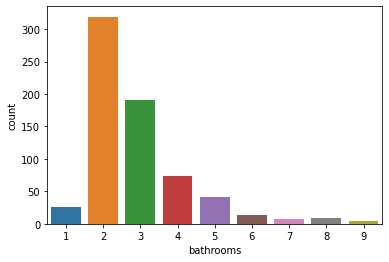

In [67]:
sns.countplot(x='bathrooms',data=house)
plt.show()

+ There are more houses available for sale with 2 and 3 no. of bathrooms

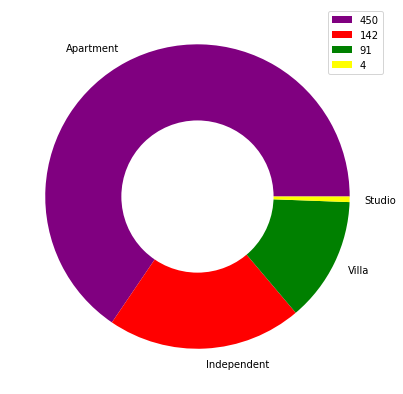

In [68]:
plt.figure(figsize=(7,7))
number=house.building_type.value_counts()
values=number.values
type=number.index
plt.pie(values,labels=type,colors=["purple","red","green","yellow"])
centre_circle=plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.legend(values)
plt.show()

+ There are 491 Apartments,154 Independent houses,93 Villas and 4 Studios for sale in hyderabad

C:\Users\VIRAJ\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


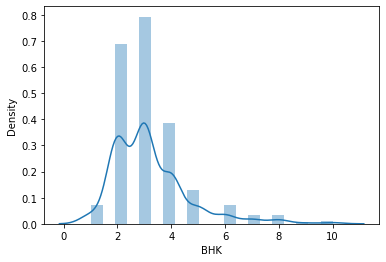

In [69]:
sns.distplot(house.BHK)
plt.show()

In [70]:
house.house_status.value_counts()

Resale           453
not mentioned    147
New               87
Name: house_status, dtype: int64

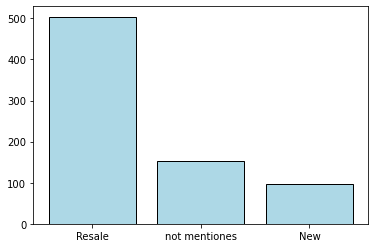

In [71]:
status=["Resale","not mentiones","New"]
values=[504,154,97]
plt.bar(status,values,color="lightblue",edgecolor="black")
plt.show()

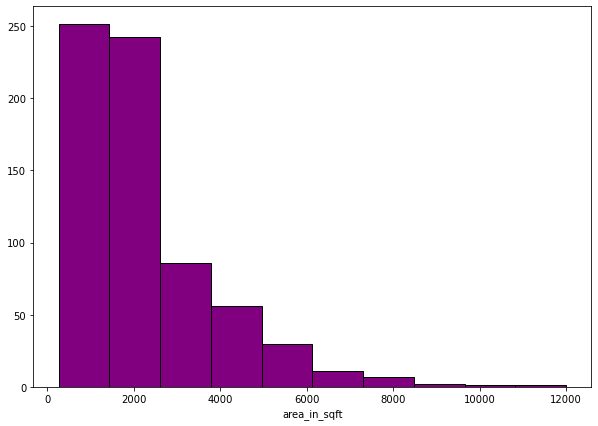

In [92]:
values=house.area_in_sqft
plt.figure(figsize=(10,7))
plt.hist(values,histtype="bar",color=['purple'],edgecolor="black",bins=10)
plt.xlabel('area_in_sqft')
plt.show()


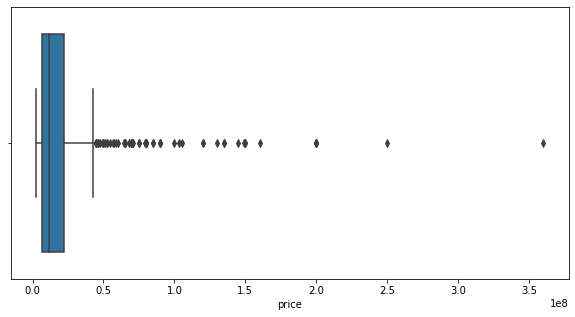

In [73]:
plt.figure(figsize=(10,5))
sns.boxplot(x="price",data=house)
plt.show()

In [74]:
Q1,Q3=house['price'].quantile([.25,.75])
print(Q1)
Q3

6800000.0


22000000.0

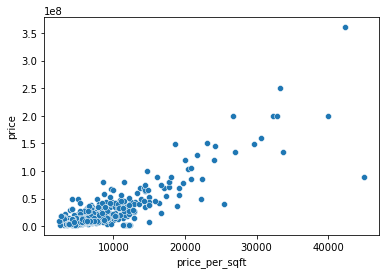

In [75]:
sns.scatterplot(x='price_per_sqft',y='price',data=house)
plt.show()

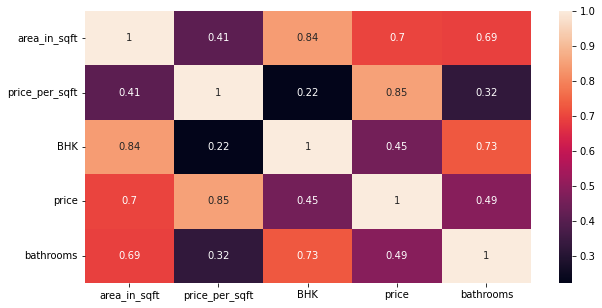

In [76]:
plt.figure(figsize=(10,5))
sns.heatmap(house.corr(),annot=True)
plt.show()

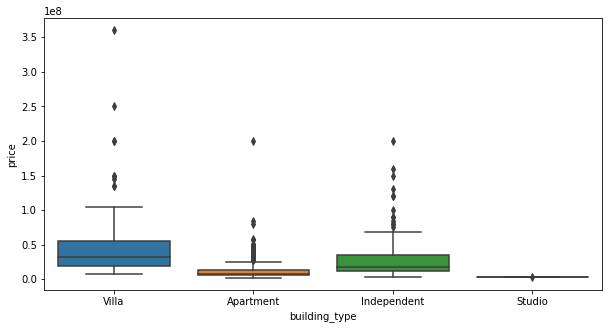

In [77]:
plt.figure(figsize=(10,5))
sns.boxplot(x='building_type',y='price',data=house)
plt.show()

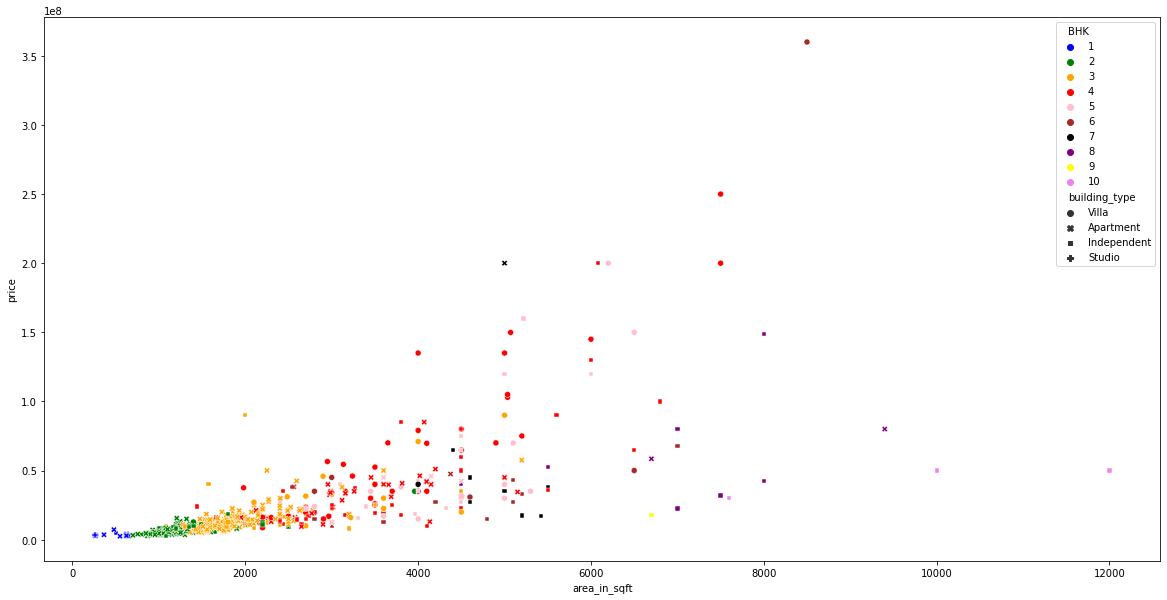

In [78]:
plt.figure(figsize=(20,10))
color_dict=dict({1:'blue',2:'green',3:'orange',4:'red',5:'pink',6:'brown',7:'black',8:'purple',9:'yellow',10:'violet',})
sns.scatterplot(x="area_in_sqft",y="price",data=house,hue="BHK",style="building_type",palette=color_dict,legend='full')
plt.show()

In [79]:
house.location.value_counts()

Kompally                  24
Manikonda                 24
Yapral                    22
Kondapur                  21
Kukatpally                20
                          ..
Nallagandla Road           1
Hyder Nagar                1
Mettuguda                  1
KPHB                       1
Dwarkamai Nagar Colony     1
Name: location, Length: 173, dtype: int64

In [80]:
h1=house[(house.location=='Gachibowli')|(house.location=='Manikonda')|(house.location=='Madhapur')|(house.location=='Kondapur')|(house.location=='Kukatpally')]
h1

,name,location,area_in_sqft,price_per_sqft,BHK,price,building_type,bathrooms,house_status
0,Swaraj Homes Nectar Gardens,Madhapur,3650,19178,4,70000000,Villa,4,Resale
2,Reputed Builder Indira Nivas,Kukatpally,1500,4333,3,6500000,Apartment,3,Resale
11,Apartment,Kukatpally,1250,5280,2,6600000,Apartment,2,Resale
12,Apartment,Manikonda,959,5630,2,5400000,Apartment,2,Resale
22,Anuhar 99 Parc,Manikonda,1650,6363,3,10500000,Apartment,3,Resale
...,...,...,...,...,...,...,...,...,...
647,Sri Fortune Towers,Kondapur,3120,9134,4,28500000,Apartment,4,Resale
653,Aryamitra Trenton Park,Manikonda,1200,5166,2,6200000,Apartment,2,Resale
654,Apartment,Madhapur,3120,12179,3,38000000,Apartment,3,not mentioned
696,Apartment,Manikonda,1545,4530,3,7000000,Apartment,3,Resale


In [81]:
h1.groupby(['location','BHK','building_type'])['price_per_sqft','price'].describe()

C:\Users\VIRAJ\AppData\Local\Temp\ipykernel_6716\2444520457.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  h1.groupby(['location','BHK','building_type'])['price_per_sqft','price'].describe()


price_per_sqft                             \
                                      count          mean          std   
location   BHK building_type                                             
Gachibowli 1   Studio                   1.0  11509.000000          NaN   
           2   Apartment                1.0   5405.000000          NaN   
           3   Apartment                4.0   9772.750000  2079.889160   
           4   Apartment                3.0   7353.333333  1978.579373   
               Villa                    1.0  33750.000000          NaN   
           5   Apartment                1.0  11084.000000          NaN   
           8   Independent              1.0   9545.000000          NaN   
Kondapur   1   Apartment                3.0  10994.666667  1274.531417   
               Studio                   3.0  12061.666667   188.152420   
           2   Apartment                7.0   7978.714286  1799.316788   
           3   Apartment                5.0  11507.600000  6372.354847   
               Villa                    1.0  15827.000000          NaN   
           4   Apartment                2.0   9067.000000    94.752309   
Kukatpally 1   Apartment                1.0   5676.000000          NaN   
           2   Apartment                5.0   4933.200000  1019.566918   
           3   Apartment                8.0   8210.250000  1893.955479   
           4   Independent              1.0  11111.000000          NaN   
               Villa                    2.0  16674.500000  3503.714101   
           7   Villa                    1.0  10000.000000          NaN   
           8   Apartment                1.0   8510.000000          NaN   
               Independent              1.0   8888.000000          NaN   
Madhapur   3   Apartment                4.0  11433.500000  3734.620954   
           4   Apartment                3.0  14336.666667  5679.578271   
               Villa                    2.0  17089.000000  2954.292132   
           6   Apartment                1.0  10857.000000          NaN   
Manikonda  2   Apartment                9.0   5316.111111   893.201467   
           3   Apartment                8.0   6307.500000  2125.950073   
               Villa                    2.0   5925.000000   459.619408   
           4   Apartment                3.0   9963.000000  1356.306381   
           5   Apartment                1.0   9444.000000          NaN   
           6   Villa                    1.0   7692.000000          NaN   

                                                                             \
                                  min       25%      50%       75%      max   
location   BHK building_type                                                  
Gachibowli 1   Studio         11509.0  11509.00  11509.0  11509.00  11509.0   
           2   Apartment       5405.0   5405.00   5405.0   5405.00   5405.0   
           3   Apartment       7452.0   8348.25   9852.0  11276.50  11935.0   
           4   Apartment       6211.0   6211.00   6211.0   7924.50   9638.0   
               Villa          33750.0  33750.00  33750.0  33750.00  33750.0   
           5   Apartment      11084.0  11084.00  11084.0  11084.00  11084.0   
           8   Independent     9545.0   9545.00   9545.0   9545.00   9545.0   
Kondapur   1   Apartment       9589.0  10454.50  11320.0  11697.50  12075.0   
               Studio         11851.0  11986.00  12121.0  12167.00  12213.0   
           2   Apartment       6250.0   6797.00   7200.0   8722.00  11363.0   
           3   Apartment       5487.0   8894.00   9375.0  11560.00  22222.0   
               Villa          15827.0  15827.00  15827.0  15827.00  15827.0   
           4   Apartment       9000.0   9033.50   9067.0   9100.50   9134.0   
Kukatpally 1   Apartment       5676.0   5676.00   5676.0   5676.00   5676.0   
           2   Apartment       3333.0   4560.00   5280.0   5660.00   5833.0   
           3   Apartment       4333.0   7926.75   9073.5   9087.00  10169.0   
           

In [82]:
h1.groupby(['location','BHK','building_type']).area_in_sqft.describe()

count         mean          std     min     25%  \
location   BHK building_type                                                    
Gachibowli 1   Studio           1.0   265.000000          NaN   265.0   265.0   
           2   Apartment        1.0  2035.000000          NaN  2035.0  2035.0   
           3   Apartment        4.0  2718.000000  1676.769115  1550.0  1818.5   
           4   Apartment        3.0  3100.666667   908.749324  2576.0  2576.0   
               Villa            1.0  4000.000000          NaN  4000.0  4000.0   
           5   Apartment        1.0  4150.000000          NaN  4150.0  4150.0   
           8   Independent      1.0  5500.000000          NaN  5500.0  5500.0   
Kondapur   1   Apartment        3.0   298.333333    57.735027   265.0   265.0   
               Studio           3.0   265.333333     4.163332   262.0   263.0   
           2   Apartment        7.0  1166.857143   110.138441  1000.0  1116.0   
           3   Apartment        5.0  1918.800000   378.651819  1574.0  1640.0   
               Villa            1.0  2900.000000          NaN  2900.0  2900.0   
           4   Apartment        2.0  4060.000000  1329.360749  3120.0  3590.0   
Kukatpally 1   Apartment        1.0  1145.000000          NaN  1145.0  1145.0   
           2   Apartment        5.0  1162.000000    99.849887  1050.0  1060.0   
           3   Apartment        8.0  1759.000000   177.614349  1475.0  1657.5   
           4   Independent      1.0  4500.000000          NaN  4500.0  4500.0   
               Villa            2.0  3095.000000   205.060967  2950.0  3022.5   
           7   Villa            1.0  4000.000000          NaN  4000.0  4000.0   
           8   Apartment        1.0  9400.000000          NaN  9400.0  9400.0   
               Independent      1.0  4500.000000          NaN  4500.0  4500.0   
Madhapur   3   Apartment        4.0  2268.750000   719.518068  1560.0  1740.0   
           4   Apartment        3.0  3438.333333   564.055257  2985.0  3122.5   
               Villa            2.0  3575.000000   106.066017  3500.0  3537.5   
           6   Apartment        1.0  4375.000000          NaN  4375.0  4375.0   
Manikonda  2   Apartment        9.0  1142.666667   130.294858   959.0  1000.0   
           3   Apartment        8.0  1625.500000   150.885008  1400.0  1540.0   
               Villa            2.0  2530.000000  1513.208512  1460.0  1995.0   
           4   Apartment        3.0  3501.666667   297.136893  3159.0  3408.5   
           5   Apartment        1.0  4500.000000          NaN  4500.0  4500.0   
           6   Villa            1.0  6500.000000          NaN  6500.0  6500.0   

                                 50%      75%     max  
location   BHK building_type                           
Gachibowli 1   Studio          265.0   265.00   265.0  
           2   Apartment      2035.0  2035.00  2035.0  
           3   Apartment      2061.0  2960.50  5200.0  
           4   Apartment      2576.0  3363.00  4150.0  
               Villa          4000.0  4000.00  4000.0  
           5   Apartment      4150.0  4150.00  4150.0  
           8   Independent    5500.0  5500.00  5500.0  
Kondapur   1   Apartment       265.0   315.00   365.0  
               Studio          264.0   267.00   270.0  
           2   Apartment      1198.0  1209.00  1320.0  
           3   Apartment      1730.0  2250.00  2400.0  
               Villa          2900.0  2900.00  2900.0  
           4   Apartment      4060.0  4530.00  5000.0  
Kukatpally 1   Apartment      1145.0  1145.00  1145.0  
           2   Apartment      1200.0  1250.00  1250.0  
           3   Apartment      1870.5  1872.75  1899.0  
           4   Independent    4500.0  4500.00  4500.0  
               Villa          3095.0  3167.50  3240.0  
           7   Villa          4000.0  4000.00  4000.0  
           8   Apartment      9400.0  9400.00  9400.0  
               Independent    4500.0  4500.00  4500.0  
Madhapur   3   Apartment      2197.5  2726.25  3120.0  
           4

In [83]:
house[(house["price"]>5000000) & (house["price"]<8000000) & (house["location"]=="Kukatpally")&(house["building_type"]=="Apartment")]

,name,location,area_in_sqft,price_per_sqft,BHK,price,building_type,bathrooms,house_status
2,Reputed Builder Indira Nivas,Kukatpally,1500,4333,3,6500000,Apartment,3,Resale
11,Apartment,Kukatpally,1250,5280,2,6600000,Apartment,2,Resale
26,Apartment,Kukatpally,1060,5660,2,6000000,Apartment,2,Resale
152,Apartment,Kukatpally,1250,4560,2,5700000,Apartment,2,Resale
463,Apartment,Kukatpally,1145,5676,1,6500000,Apartment,3,Resale
511,Apartment,Kukatpally,1200,5833,2,7000000,Apartment,2,not mentioned


In [84]:
house.building_type.value_counts()

Apartment      450
Independent    142
Villa           91
Studio           4
Name: building_type, dtype: int64

In [85]:
house[(house.building_type=='Villa')&(house.area_in_sqft>5000)&(house.area_in_sqft<10000)]

,name,location,area_in_sqft,price_per_sqft,BHK,price,building_type,bathrooms,house_status
59,Sri Esmeralda Fortune,Serilingampally,6200,32258,5,200000000,Villa,7,Resale
71,Concrete OU Colony,Shaikpet,5100,13705,5,69900000,Villa,5,New
121,Villa,Gandipet,6500,23076,5,150000000,Villa,5,New
123,Villa,Manikonda,6500,7692,6,50000000,Villa,9,Resale
135,Villa,Banjara Hills,6000,24166,4,145000000,Villa,3,Resale
322,Villa,Jubilee Hills,7500,33333,4,250000000,Villa,4,Resale
345,Villa,Jubilee Hills,7500,26666,4,200000000,Villa,4,Resale
385,Srinivasa Thiru Sankalp,Nizampet,5300,6603,5,35000000,Villa,5,Resale
451,Poulomi Aristos,Kokapet,5070,29585,4,149900000,Villa,7,Resale
567,Villa,Jubilee Hills,8500,42352,6,360000000,Villa,6,Resale


### Houses whose price is between 25lacs to 50lacs

In [86]:
h2=house[(house["price"]>=2500000) & (house["price"]<=5000000)]
h2

,name,location,area_in_sqft,price_per_sqft,BHK,price,building_type,bathrooms,house_status
21,Apartment,Kushaiguda,960,5208,2,5000000,Apartment,2,Resale
44,Apartment,Dammaiguda,909,4180,2,3800000,Apartment,2,Resale
45,Parijatha Pride,Shamirpet,1000,3500,2,3500000,Apartment,2,Resale
72,Apartment,Pragathi Nagar Kukatpally,960,5052,2,4849000,Apartment,2,Resale
78,Apartment,Nagole,1102,3493,2,3850000,Apartment,2,New
...,...,...,...,...,...,...,...,...,...
755,Swaraj Homes Mythri Residency,Chandanagar,850,5305,2,4510000,Apartment,2,Resale
763,Apartment,AS Rao Nagar,1000,4500,2,4500000,Apartment,2,not mentioned
771,Apartment,Mahindra Hills,700,4571,2,3200000,Apartment,2,not mentioned
773,Apartment,Alwal,1250,4000,2,5000000,Apartment,2,Resale


In [87]:
h2.building_type.value_counts()

Apartment      72
Studio          4
Independent     3
Name: building_type, dtype: int64

+ There are 78 Apartments, 4 Studios and 3 independent houses available for sale in price range 25lakhs to 50lakhs